In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow.keras.metrics import MeanSquaredError

## Downloading California Housing Dataset

In [2]:
ch = fetch_california_housing()
print(ch.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
x = pd.DataFrame(fetch_california_housing().data)
y = pd.DataFrame(fetch_california_housing().target)

## Normalising the data

In [4]:
scale = MinMaxScaler()
scalled = scale.fit_transform(x,y)

In [5]:
x = scalled[:,0:8]
y = scalled[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [6]:
x_train.shape

(16512, 8)

In [7]:
x_test.shape

(4128, 8)

In [8]:
y_train.shape

(16512,)

In [9]:
y_test.shape

(4128,)

# Regression Multi-Layer Perceptron

In [10]:
model = keras.Sequential([keras.layers.InputLayer(input_shape = 8, name = "InputLayer"), 
                          keras.layers.Dense(30, activation="relu", name = "hiddenlayer1"),
                          keras.layers.Dense(1, activation="relu", name = "outputlayer")
                          ])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[MeanSquaredError(name='mse')])
history = model.fit(x_train, y_train, epochs=20, validation_split=0.125, batch_size=4)

Epoch 1/20
3612/3612 [==============================] - 10s 2ms/step - loss: 5.7733e-04 - mse: 5.7733e-04 - val_loss: 3.6478e-04 - val_mse: 3.6478e-04
Epoch 2/20
3612/3612 [==============================] - 8s 2ms/step - loss: 4.9456e-05 - mse: 4.9456e-05 - val_loss: 8.1330e-06 - val_mse: 8.1330e-06
Epoch 3/20
3612/3612 [==============================] - 8s 2ms/step - loss: 4.4394e-05 - mse: 4.4394e-05 - val_loss: 3.2270e-06 - val_mse: 3.2270e-06
Epoch 4/20
3612/3612 [==============================] - 14s 4ms/step - loss: 1.8290e-05 - mse: 1.8290e-05 - val_loss: 4.1316e-05 - val_mse: 4.1316e-05
Epoch 5/20
3612/3612 [==============================] - 9s 2ms/step - loss: 1.1283e-05 - mse: 1.1283e-05 - val_loss: 1.6157e-07 - val_mse: 1.6157e-07
Epoch 6/20
3612/3612 [==============================] - 8s 2ms/step - loss: 1.7624e-05 - mse: 1.7624e-05 - val_loss: 4.5600e-05 - val_mse: 4.5600e-05
Epoch 7/20
3612/3612 [==============================] - 8s 2ms/step - loss: 1.6315e-05 - mse: 1.63

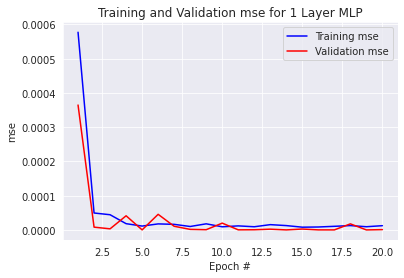

In [11]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history.history['mse']
val_rmse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training mse')
plt.plot(epochs, val_rmse, 'r', label='Validation mse')
plt.xlabel('Epoch #')
plt.ylabel('mse')
plt.title('Training and Validation mse for 1 Layer MLP')
plt.legend()

plt.show()

In [12]:
model.evaluate(x_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 2.7099e-07 - mse: 2.7099e-07


[2.709889486141037e-07, 2.709889486141037e-07]

The Regression MLP gives an accuracy in the range of 5x10^-6 for training and 7x10^-7 for testing which is a very good accuracy

# Deep and wide Neural Network
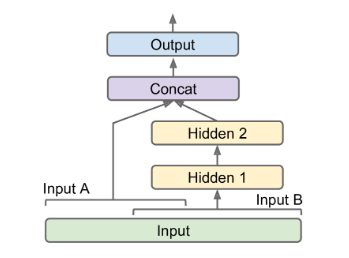

In [13]:
x_wide_train = x_train[:, 0:5]
x_deep_train = x_train[:, 2:8]

#x_wide_train, x_wide_test, y_train, y_test = train_test_split(x_wide, y, test_size=0.20, random_state=42)
#x_deep_train, x_deep_test, y_train, y_test = train_test_split(x_deep, y, test_size=0.20, random_state=42)

In [14]:
inputA = keras.layers.Input(shape=(5))
inputB = keras.layers.Input(shape=(6))
hidden1 = keras.layers.Dense(30, activation="relu")(inputB)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([inputA, hidden2])
output = keras.layers.Dense(1, activation="relu")(concat)
model = keras.Model(inputs=[inputA, inputB], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[MeanSquaredError(name='mse')])
history = model.fit((x_wide_train, x_deep_train), y_train, epochs=20, validation_split=0.125, batch_size=4)

Epoch 1/20
3612/3612 [==============================] - 9s 2ms/step - loss: 0.0677 - mse: 0.0677 - val_loss: 2.5322e-05 - val_mse: 2.5322e-05
Epoch 2/20
3612/3612 [==============================] - 8s 2ms/step - loss: 6.0450e-05 - mse: 6.0450e-05 - val_loss: 4.9783e-05 - val_mse: 4.9783e-05
Epoch 3/20
3612/3612 [==============================] - 8s 2ms/step - loss: 6.9133e-05 - mse: 6.9133e-05 - val_loss: 3.1832e-06 - val_mse: 3.1832e-06
Epoch 4/20
3612/3612 [==============================] - 8s 2ms/step - loss: 4.7944e-05 - mse: 4.7944e-05 - val_loss: 3.1534e-06 - val_mse: 3.1534e-06
Epoch 5/20
3612/3612 [==============================] - 9s 2ms/step - loss: 1.7149e-05 - mse: 1.7149e-05 - val_loss: 3.2874e-06 - val_mse: 3.2874e-06
Epoch 6/20
3612/3612 [==============================] - 8s 2ms/step - loss: 2.6528e-05 - mse: 2.6528e-05 - val_loss: 3.5981e-06 - val_mse: 3.5981e-06
Epoch 7/20
3612/3612 [==============================] - 9s 2ms/step - loss: 4.7000e-05 - mse: 4.7000e-05 - v

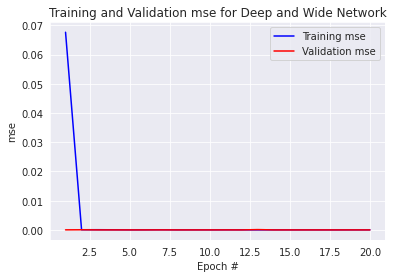

In [16]:
sns.set_style("darkgrid")
#get the details form the history object
rmse = history.history['mse']
val_rmse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)

#Train and validation accuracy
plt.plot(epochs, rmse, 'b', label='Training mse')
plt.plot(epochs, val_rmse, 'r', label='Validation mse')
plt.xlabel('Epoch #')
plt.ylabel('mse')
plt.title('Training and Validation mse for Deep and Wide Network')
plt.legend()

plt.show()

In [19]:
model.evaluate(x = [x_test[:,0:5], x_test[:,2:8]], y = y_test)

129/129 [==============================] - 0s 2ms/step - loss: 1.0418e-06 - mse: 1.0418e-06


[1.041773202814511e-06, 1.041773202814511e-06]

The Deep and Wide Neural Network has similar MSE compared to a Regression MLP.